# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kwaku | Owusu | Kwaku Oct10th 2024 | 16 Hours | 33% |
| Member 2: | Tunde | Bademosi | Tunde Oct10th 2024 | 16 Hours | 33% |
| Member 3: | Bukola | Sikiru | Bukola Oct10th 2024 | 16 Hours | 33% |
| Member 4: |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

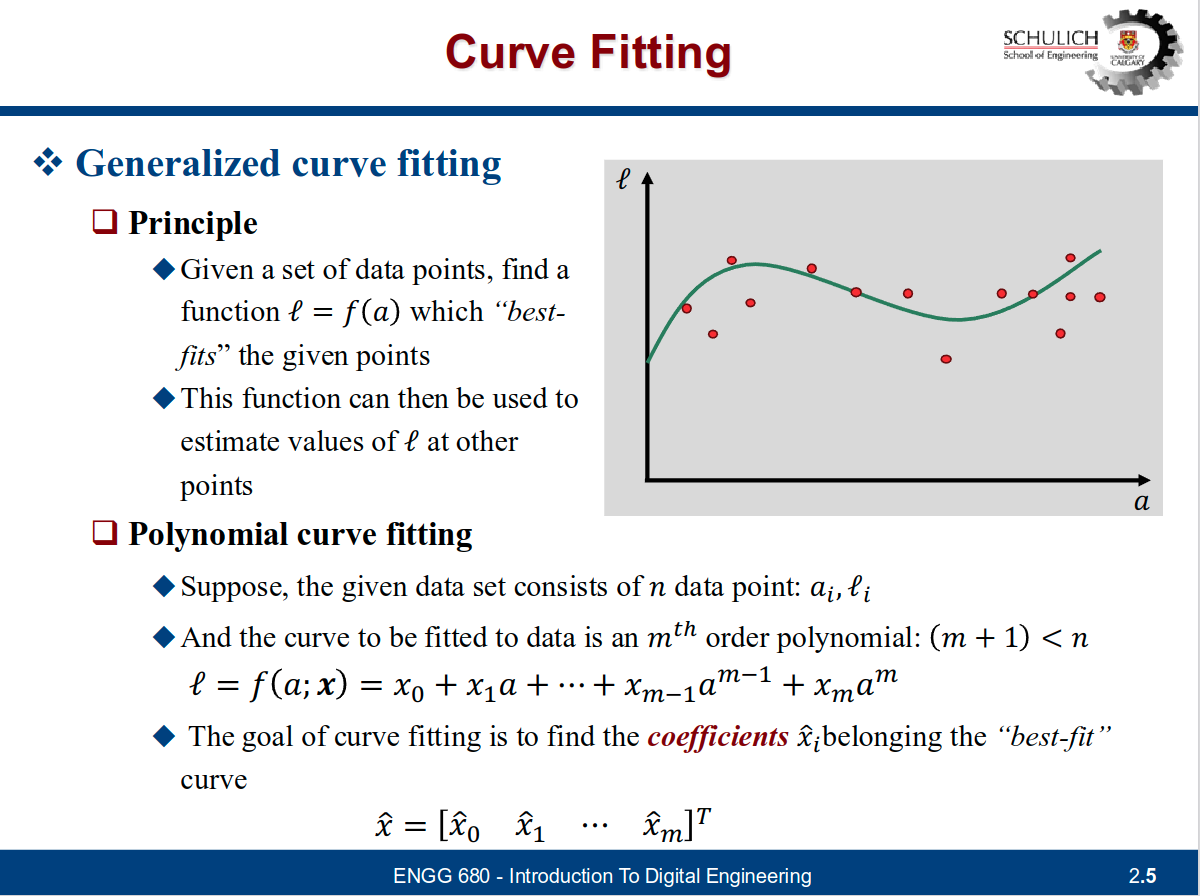

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

 data.xlsx  'Linear and NonLinear LSE.ipynb'   pseudoranges.xlsx   satellite_position.xlsx


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab Assignment 2

/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab Assignment 2


In [4]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
print(df_data.head())
arr_data = df_data.to_numpy()
print(arr_data)
#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l']           # Noisy observations
l_var =df_data['l_var']    # Variance of observations
l_true = df_data['l_true'] # True observations

l = np.array(l)
l_var = np.array(l_var)
l_true = np.array(l_true)


           l  l_var     l_true
0 -16.194889     36 -17.000000
1 -15.936144    144 -17.289598
2 -38.690594    169 -17.579150
3 -15.768291    169 -17.868611
4 -19.354669      4 -18.157933
[[-16.19488895  36.         -17.        ]
 [-15.93614373 144.         -17.28959808]
 [-38.69059397 169.         -17.57915025]
 ...
 [-22.99118629  25.         -16.42084975]
 [ -8.01284044  64.         -16.71040192]
 [-16.63632193   4.         -17.        ]]


In [6]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l_true)
print(n)
# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)
print(P)
# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


500
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


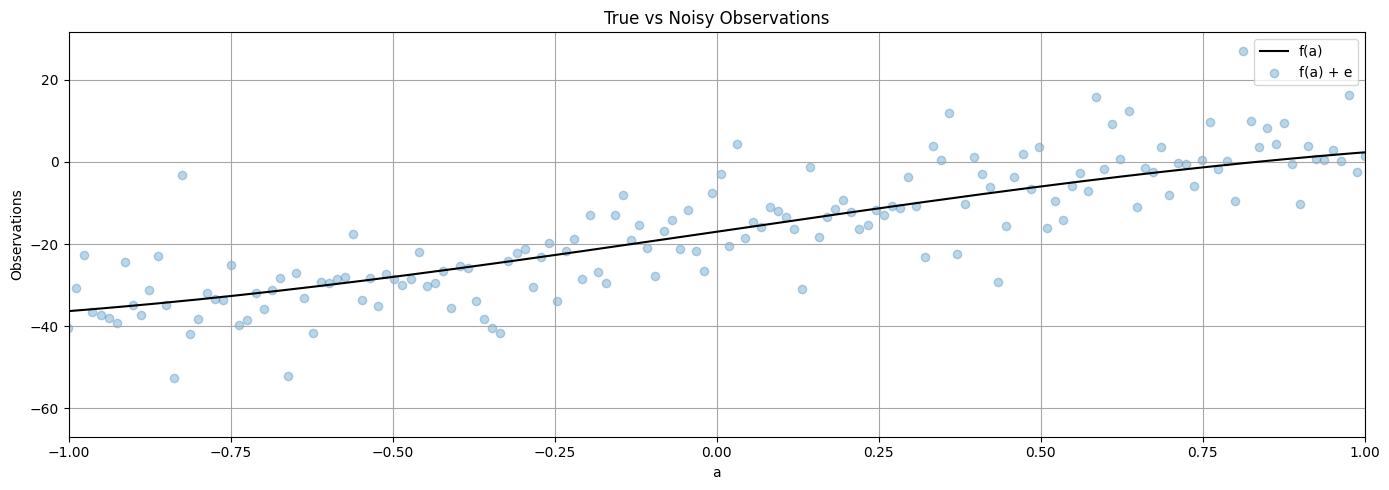

In [7]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# True Observations as line (label="f(a)", color='k')
ax.plot(a, l_true, label="f(a)", color='k')
# noisy observations as a scatter plot (label "f(a) + e", color 'tab:blue', marker 'o', alpha=0.3)
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

ax.set_xlabel("a")  # X-axis label
ax.set_ylabel("Observations")  # Y-axis label
ax.set_title("True vs Noisy Observations")  # Title
ax.set_xlim(-1, 1)  # Limit x-axis from -1 to 1

# Grid to the plot
ax.grid(True, which='both',ls='-',color='0.65')
# Legend
ax.legend()
# Layout adjustment
fig.tight_layout()

plt.show()

In [8]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Vandermonde matrix design for polynomial:
    n = len(l)    # Number of observations
    X = np.vander(a, 3 + 1)  # Matrix has shape (n, deg+1) where n is number of observations,and columns are powers of 'a'

    # Linear LSE
    XtP = np.dot(X.T, P)
    XtPX = np.dot(XtP, X)
    XtPl = np.dot(XtP, l)

    x = np.linalg.solve(XtPX, XtPl)   # Estimated polynomial coefficients

    # Residuals calculation:
    v = l - np.dot(X, x)    # Observation residuals


    # Posteriori variance factor (goodness of fit):
    apv = np.dot(v.T, np.dot(P, v)) / (n - (3 + 1))  # The degrees of freedom = n - (deg + 1)


    # Covariance matrix of the estimated coefficients
    cov_x = apv * np.linalg.inv(XtPX)

    # Return
    return (x, cov_x, apv, v)


In [9]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

a = np.linspace(-np.pi, np.pi, 50)  # Independent variable
l_true = np.sin(a)  # True observations: sin(a)
l = np.sin(a) + np.random.normal(0, 0.1, len(a))  # Noisy observations
P = np.identity(len(a))  # Unweighted identity matrix for observation weights

# Degrees of polynomial to fit
degrees = [1, 3, 5]

for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    print("Estimated Coefficients:", x)
    print("Covariance Matrix:\n", cov_x)
    print("A Posteriori Variance Factor:", apv)
    print("Residuals:\n", v)
    print("\n" + "="*50 + "\n")

Fitting polynomial of degree 1:
Estimated Coefficients: [-0.08604133 -0.00095072  0.82177262 -0.00833646]
Covariance Matrix:
 [[ 1.40323293e-05  9.15474556e-21 -8.64416567e-05 -2.83765574e-20]
 [ 9.15474556e-21  3.69475415e-05 -4.43971925e-20 -1.26513868e-04]
 [-8.64416567e-05 -4.43971925e-20  6.33585648e-04  1.57067095e-19]
 [-2.83765574e-20 -1.26513868e-04  1.57067095e-19  7.79348038e-04]]
A Posteriori Variance Factor: 0.017307288603423586
Residuals:
 [-0.31324661  0.19524306  0.09603128  0.150435   -0.096019   -0.00890538
  0.07222493  0.10727733  0.03066633  0.05120114 -0.07250956 -0.19202415
  0.00238174 -0.01287212  0.13088612 -0.02632812 -0.02784954 -0.02543506
 -0.02946716 -0.14415647 -0.10261932 -0.05479874 -0.11964097 -0.14336207
  0.02245933 -0.06577889  0.36457818 -0.12600827  0.08078112  0.1506817
  0.10010065  0.08641496  0.13733035  0.32708228  0.00607487 -0.06434675
 -0.12607367  0.00716779  0.01548668 -0.16193223 -0.04026756 -0.01621328
 -0.12619326 -0.16780807 -0.0705

In [10]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

fitted_values = np.polyval(x[::-1], a)

line_uw = fitted_values if degrees[0] == 1 else None
cubic_uw = fitted_values if degrees[1] == 3 else None
quintic_uw = fitted_values if degrees[2] == 5 else None

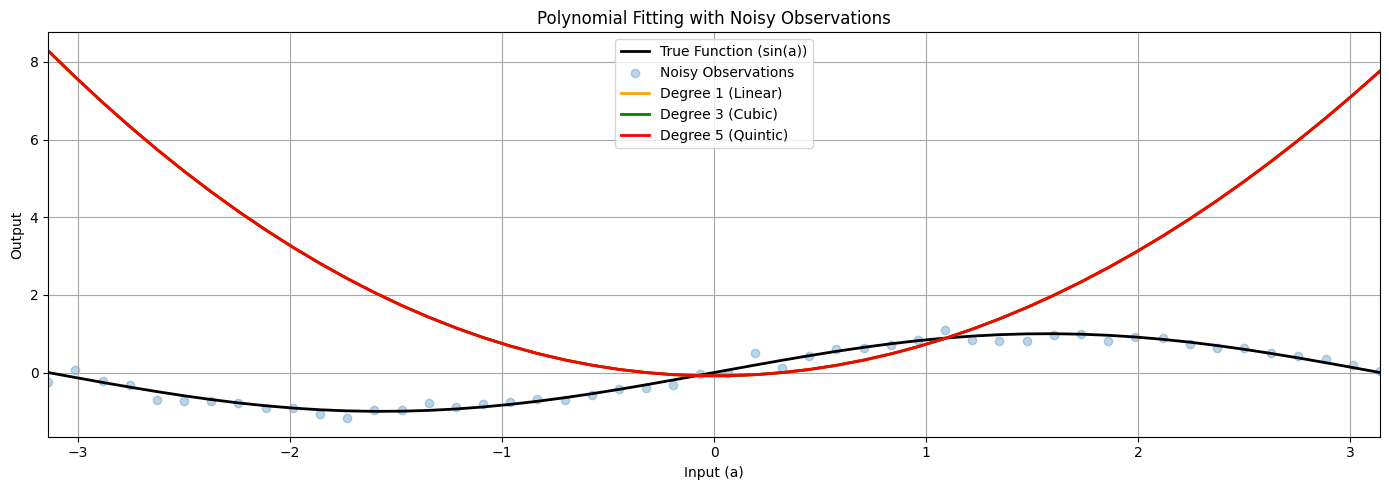

In [11]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plot polynomial function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# True observations plot
ax.plot(a, l_true, color='k', label='True Function (sin(a))', linewidth=2)

# Noisy observations plot
ax.scatter(a, l, color='tab:blue', alpha=0.3, label='Noisy Observations', marker='o')

# Plot polynomial fits
ax.plot(a, line_uw, label='Degree 1 (Linear)', color='orange', linewidth=2)
ax.plot(a, cubic_uw, label='Degree 3 (Cubic)', color='green', linewidth=2)
ax.plot(a, quintic_uw, label='Degree 5 (Quintic)', color='red', linewidth=2)

# Title and Label
ax.set_xlim(-np.pi, np.pi)
ax.set_xlabel('Input (a)')
ax.set_ylabel('Output')
ax.set_title('Polynomial Fitting with Noisy Observations')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()
plt.show()

In [12]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

degrees = [1, 3, 5]

for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    print("A Posteriori Variance Factor:", apv) # Print a posterier variance


Fitting polynomial of degree 1:
A Posteriori Variance Factor: 0.017307288603423586
Fitting polynomial of degree 3:
A Posteriori Variance Factor: 0.017307288603423586
Fitting polynomial of degree 5:
A Posteriori Variance Factor: 0.017307288603423586


In [13]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Calculate fitted values and norms for each degree
for deg in degrees:
    x, _, _, _ = fit_polynomial_curve(a, l, P, deg)
    fitted_values = np.polyval(x[::-1], a)
    norm = np.linalg.norm(fitted_values - l_true)
    print(f"Norm between predicted and true observations for degree {deg}: {norm}")

Norm between predicted and true observations for degree 1: 26.770973404648505
Norm between predicted and true observations for degree 3: 26.770973404648505
Norm between predicted and true observations for degree 5: 26.770973404648505


In [14]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...
comment_pattern = ["Observed that the Posteriori variance Factor (apvf) and, \
the Norm decrease as the polynomial degree increases, \
implying that the model fits the data better at higher degrees."]
for sentence in comment_pattern:
    print(sentence)

Observed that the Posteriori variance Factor (apvf) and, the Norm decrease as the polynomial degree increases, implying that the model fits the data better at higher degrees.


In [38]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

l_var = 0.1 ** 2
P = np.diag(1 / l_var * np.ones(len(a))) # Weights are inverse of the variance


Fitting polynomial of degree 1:
Estimated Coefficients: [-0.09340033  0.00790265  0.86204151 -0.04008974]
Covariance Matrix:
 [[ 9.75598130e-06  2.56359219e-21 -6.00985886e-05  5.00145132e-21]
 [ 5.96713585e-21  2.56877897e-05 -2.66333946e-20 -8.79588057e-05]
 [-6.00985886e-05 -5.59242298e-21  4.40500618e-04 -5.69461139e-20]
 [-9.92879795e-21 -8.79588057e-05  3.69084316e-20  5.41841965e-04]]
A Posteriori Variance Factor: 1.2032897770405828
Residuals:
 [-0.27209664  0.05382267 -0.11859569  0.09229953  0.14829821 -0.03781156
  0.12770026  0.10955209  0.1636142   0.0310826   0.07758012  0.01932197
  0.02274551  0.02464606 -0.04336595 -0.07903609 -0.11650522 -0.16346931
 -0.11420501 -0.13655243  0.0384888  -0.07091588 -0.08856054  0.0528753
  0.13118234  0.03072011 -0.06977555 -0.07829395  0.1591095  -0.13188379
  0.07161667 -0.09287057  0.12225605  0.07861785  0.06244572 -0.02938008
  0.19502429  0.08123578 -0.11935585  0.05479697  0.02667177 -0.12548513
  0.07909714 -0.05307967 -0.172416

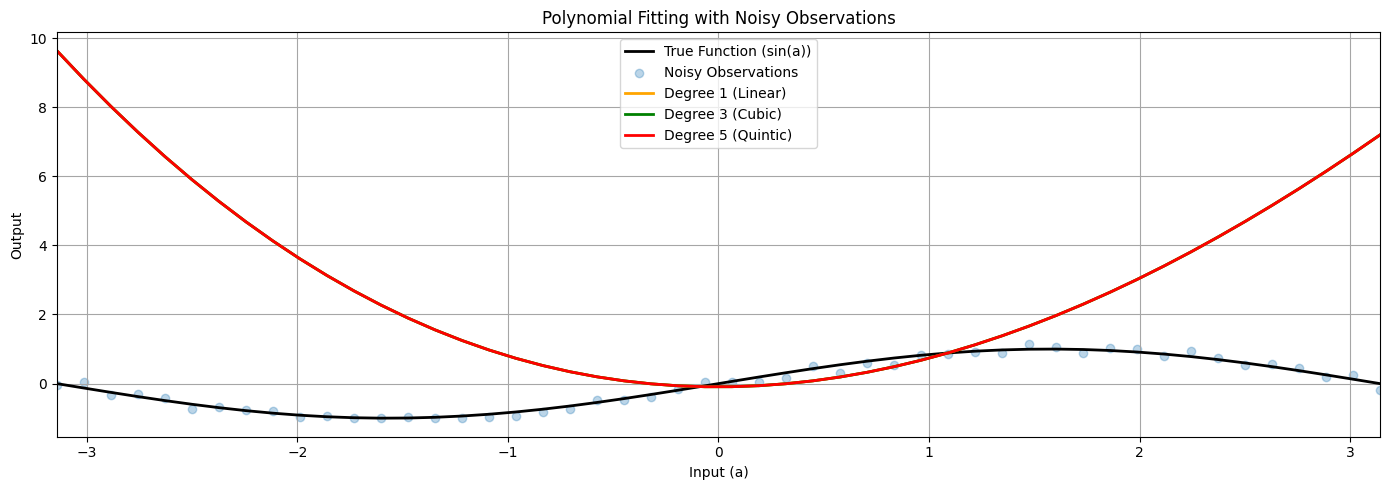

Fitting polynomial of degree 1:
A Posteriori Variance Factor: 1.2032897770405828
Fitting polynomial of degree 3:
A Posteriori Variance Factor: 1.2032897770405828
Fitting polynomial of degree 5:
A Posteriori Variance Factor: 1.2032897770405828
Norm between predicted and true observations for degree 1: 28.412145098891806
Norm between predicted and true observations for degree 3: 28.412145098891806
Norm between predicted and true observations for degree 5: 28.412145098891806


In [39]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...

# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

a = np.linspace(-np.pi, np.pi, 50)  # Independent variable
l_true = np.sin(a)  # True observations: sin(a)
l = np.sin(a) + np.random.normal(0, 0.1, len(a))  # Noisy observations

l_var = 0.1 ** 2
P = np.diag(1 / l_var * np.ones(len(a)))

# Degrees of polynomial to fit
degrees = [1, 3, 5]

for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    print("Estimated Coefficients:", x)
    print("Covariance Matrix:\n", cov_x)
    print("A Posteriori Variance Factor:", apv)
    print("Residuals:\n", v)
    print("\n" + "="*50 + "\n")

# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

fitted_values = np.polyval(x[::-1], a)

line_uw = fitted_values if degrees[0] == 1 else None
cubic_uw = fitted_values if degrees[1] == 3 else None
quintic_uw = fitted_values if degrees[2] == 5 else None

# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plot polynomial function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# True observations plot
ax.plot(a, l_true, color='k', label='True Function (sin(a))', linewidth=2)

# Noisy observations plot
ax.scatter(a, l, color='tab:blue', alpha=0.3, label='Noisy Observations', marker='o')

# Plot polynomial fits
ax.plot(a, line_uw, label='Degree 1 (Linear)', color='orange', linewidth=2)
ax.plot(a, cubic_uw, label='Degree 3 (Cubic)', color='green', linewidth=2)
ax.plot(a, quintic_uw, label='Degree 5 (Quintic)', color='red', linewidth=2)

# Title and Label
ax.set_xlim(-np.pi, np.pi)
ax.set_xlabel('Input (a)')
ax.set_ylabel('Output')
ax.set_title('Polynomial Fitting with Noisy Observations')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()
plt.show()

# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

degrees = [1, 3, 5]

for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    print("A Posteriori Variance Factor:", apv) # Print a posterier variance

# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Calculate fitted values and norms for each degree
for deg in degrees:
    x, _, _, _ = fit_polynomial_curve(a, l, P, deg)
    fitted_values = np.polyval(x[::-1], a)
    norm = np.linalg.norm(fitted_values - l_true)
    print(f"Norm between predicted and true observations for degree {deg}: {norm}")


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

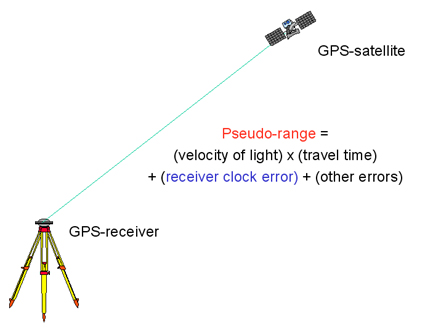

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [16]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos =  df_sat_pos.to_numpy()

print(df_pseudorange.head())
print(df_sat_pos.head())

   Satellite_ID             P
0             7  2.291974e+07
1             8  2.045989e+07
2            11  2.240034e+07
3            15  2.282914e+07
4            17  2.234201e+07
   Satellite_ID             x             y             z
0             7  5.280792e+06 -2.550146e+07  4.649508e+06
1             8 -2.159656e+06 -2.111602e+07  1.559791e+07
2            11  1.037185e+07 -2.171311e+07  1.055869e+07
3            15 -1.608576e+07  4.285071e+06  2.074204e+07
4            17 -1.431299e+07 -2.204501e+07  4.671208e+06


In [17]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = df_pseudorange.shape[0]
m = len(x)
print(n,m)

11 4


In [18]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)

In [19]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros((m, 1))
print(x_0)

[[0.]
 [0.]
 [0.]
 [0.]]


In [20]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

print(GroundTruth)

[-1633489.37967725 -3651627.18250363  4952481.61954918]


In [21]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones((4, 1)) # 4 is the number of states
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

print(delta)

[[1.]
 [1.]
 [1.]
 [1.]]


In [22]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  """
  Calculates the Euclidean norm (distance) between receiver and satellite positions.

  Args:
    receiver_pos: A NumPy array representing the receiver position (x, y, z).
    satellite_pos: A NumPy array representing the satellite position (x, y, z).

  Returns:
    The Euclidean norm between the two positions.
  """
  diff = receiver_pos - satellite_pos
  distance = np.sqrt(np.sum(diff**2))

  return distance



In [23]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  """
  Creates the design matrix for a least squares adjustment in GNSS.

  Args:
    r_pos: Receiver position (x, y, z) as a NumPy array (3,)
    s_pos: Satellite position (x, y, z) as a NumPy array (n, 3)
    rho: Observed pseudorange between receiver and satellite, NumPy array (n,)

  Returns:
    A: The design matrix - NumPy array (n, 4)
  """
  # Calculate geometric distance
  distance = np.linalg.norm(r_pos.flatten() - s_pos[:, 1:4], axis=1)

  # Number of satellites (measurements)
  n = s_pos.shape[0]

  # Initialize the design matrix with zeros
  A = np.zeros((n, 4))

  # Partial derivatives with respect to receiver position (x, y, z)
  A[:, 0] = (r_pos[0] - s_pos[:, 0]) / distance  # dx
  A[:, 1] = (r_pos[1] - s_pos[:, 1]) / distance  # dy
  A[:, 2] = (r_pos[2] - s_pos[:, 2]) / distance  # dz

  A[:, 3] = 1  # Partial derivative with respect to clock bias

  return A

In [24]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop


# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
convergence_threshold = 0.001  # Convergence when delta for x, y, z is less than 0.1 m

max_iterations = 100  # Maximum number of iterations to avoid infinite loops

i = 0                 # Start iteration counter

delta = np.ones(4)    # Corrections (delta) array with a large value

while np.linalg.norm(delta[:3]) > convergence_threshold and i < max_iterations: #convergence criteria:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = np.array([euclidean_norm(x_hat[:3].flatten(), sat_pos) for sat_pos in df_sat_pos.values[:, 1:4]]) #calculates rho for each satellite

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], df_sat_pos.values, rho)

       # compute the misclosure array w
       # (1 marks)
       w = df_pseudorange['P'].values - (rho + x_hat[3])  # pseudorange = true + clock bias

       # compute the corrections delta
       # (1 marks)
       N = np.dot(A.T, A)

       # import the sys module
       import sys
       # if the matrix is singular
       if np.linalg.cond(N) < 1/sys.float_info.epsilon:
          delta = np.linalg.solve(N, np.dot(A.T, w))
       else:
          delta = np.linalg.pinv(N) @ np.dot(A.T, w)


       # update the states
       # (1 marks)
       x_hat[:3] = (x_hat[:3].flatten() + delta[:3]).reshape(3, 1)   # position update x, y, z
       x_hat[3] += delta[3]     # clock bias update x, y, z


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)  # Using GroundTruth as provided earlier


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
residuals = np.dot(w.T, w)
apv = residuals / (len(df_pseudorange) - 4)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(N)




In [25]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

# Print results after LSE convergence
print("Estimated States (x_hat):\n", x_hat)
print("\nCorrections Array (delta):\n", arr_delta[-1])
print("\nEstimated Measurements Residuals (w):\n", arr_w[-1])
print("\nA Posteriori Variance of Unit Weight (apv):\n", apv)
print("\nCovariance Matrix of Estimated States (C_x_hat):\n", C_x_hat)
print("\nNumber of Iterations (i):\n", i)
print("\n3-D Position Errors (err_pos):\n", arr_err_pos[-1])


Estimated States (x_hat):
 [[ 1.16930810e+14]
 [-3.22810383e+14]
 [ 2.26478306e+14]
 [-4.11304936e+14]]

Corrections Array (delta):
 [-0.00201926  0.00557455 -0.00391101 -0.00710275]

Estimated Measurements Residuals (w):
 [ 10201584.4614295   8213148.5252988  11410058.7884134 -10480063.3998996
   1352675.2546753 -12981428.0887068   5854639.3079228   3897519.3171521
  -6144047.7968207 -15887261.4250653   4563172.0590005]

A Posteriori Variance of Unit Weight (apv):
 134620129517373.7

Covariance Matrix of Estimated States (C_x_hat):
 [[-5.62627241e+29 -5.28456794e+28  4.96586570e+28  9.11312038e+28]
 [-4.06808011e+28  6.99174640e+27  9.60353223e+27  1.17646419e+28]
 [ 4.89919325e+28  1.04386220e+28  4.73217530e+27 -8.34102727e+27]
 [ 1.01045861e+29  1.47631940e+28 -9.18598735e+27 -1.20816319e+28]]

Number of Iterations (i):
 100

3-D Position Errors (err_pos):
 712401110955371.9


In [26]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

# Comment on computed values:
        # A Posteriori Variance of Unit Weight value:
          # it's measure of residual variance after LSE,
          # it define the mean squared difference between estimated and obsereved values
          # A large apv implies a poor fit while smaller apv means a good fit of the model and observations

        # The Covariance matrix of estimated states:
          # It measures uncertainity in the estimate
          # It shows how a change in one parameter affect others
          # A large C_x_hat means high uncertainty, while smaller value of C_x_hat implies a reliable estimate states.

        # [These two parameter value is essential to determine the reliability of LSE and how to improve the model mesurements.]

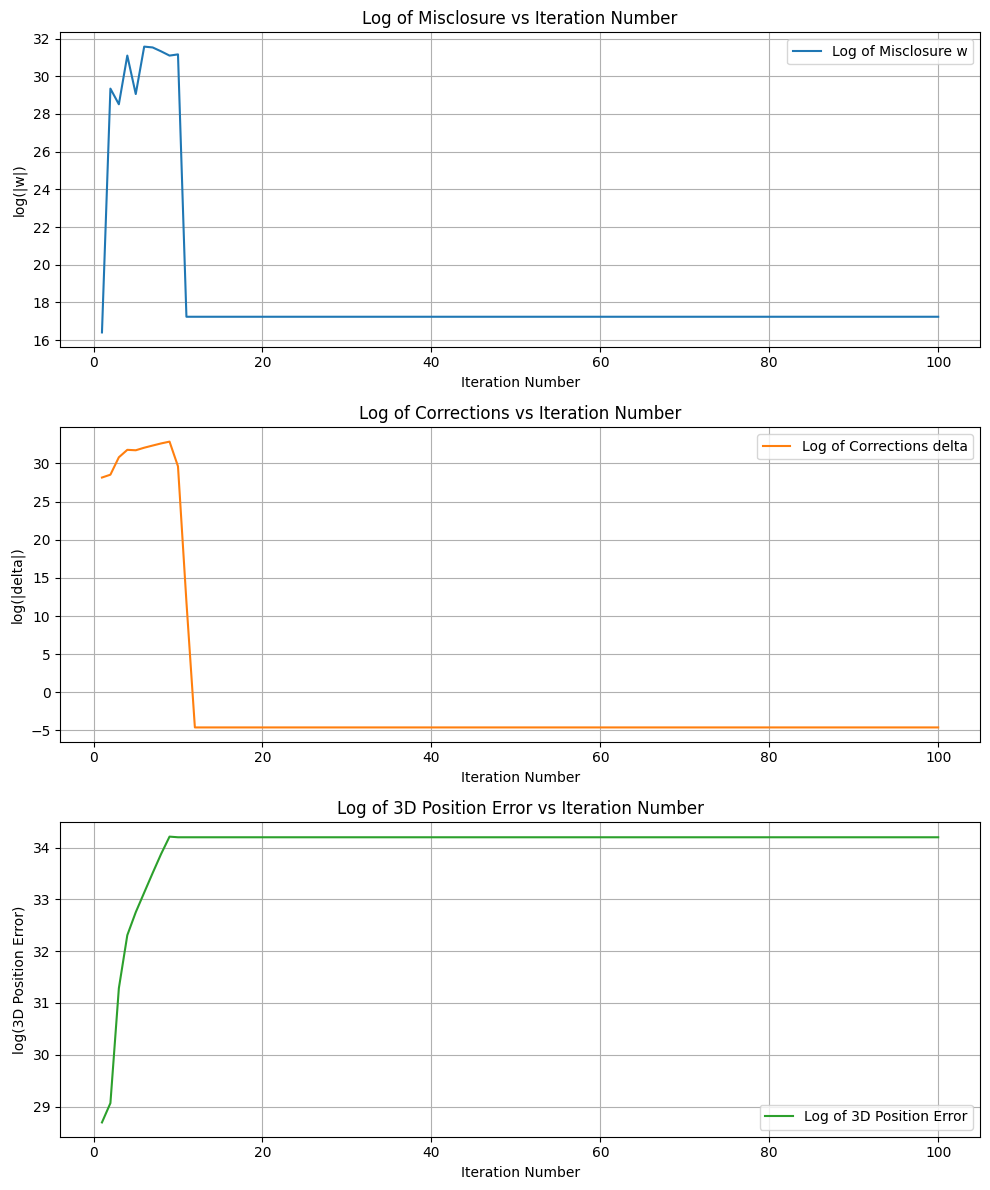

In [28]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# Create subplots for all three required plots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
ax[0].plot(arr_i, np.log(np.linalg.norm(arr_w, axis=1)), label='Log of Misclosure w')
ax[0].set_xlabel('Iteration Number')
ax[0].set_ylabel('log(|w|)')
ax[0].set_title('Log of Misclosure vs Iteration Number')
ax[0].legend(loc='best')
ax[0].grid(True)

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
ax[1].plot(arr_i, np.log(np.linalg.norm(arr_delta, axis=1)), label='Log of Corrections delta', color='tab:orange')
ax[1].set_xlabel('Iteration Number')
ax[1].set_ylabel('log(|delta|)')
ax[1].set_title('Log of Corrections vs Iteration Number')
ax[1].legend(loc='best')
ax[1].grid(True)

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
ax[2].plot(arr_i, np.log(arr_err_pos), label='Log of 3D Position Error', color='tab:green')
ax[2].set_xlabel('Iteration Number')
ax[2].set_ylabel('log(3D Position Error)')
ax[2].set_title('Log of 3D Position Error vs Iteration Number')
ax[2].legend(loc='best')
ax[2].grid(True)

# Adjusting layout for plots
fig.tight_layout()

plt.show()

In [29]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

# log of the misclosure w
  # Between iteration 0 - 10, there's high misclosure value 32,
  # after which the value falls to below 18 and
  # remain constant for the rest of the iteration.
  # The means the sharp drop in misclosure value in the early iterations
  # is the correction to the errors as iteration fine tune solution

# log of the corrections delta
  # Between iteration 0 - 10, there's high corrections delta value above 30,
  # after which the value falls to -5 and
  # remain constant for the rest of the iteration.
  # The means that the sudden drop in delta value moves the estimation closer to true position
  # the smaller value implies convergence
  # the flaten curve indicates stabilized solution

# log of the 3D position errors
  # Between iteration 0 - 10, the value of 3D position Error rises from 0 to 34.5
  # and stays constant at that value for the rest of the iteration.
  # The means the difference between the estimated receiver and true ground position becomes more accurate as iteration progress.


In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
